In [3]:
dlib.__version__

'19.22.0'

# make path, CSV

In [1]:
import cv2
import dlib


In [ ]:
img= cv2.imread('/opt/ml/newinput/UTKFace_revised/11_0_2_20170103200847287.jpg.chip.jpg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

p = '/opt/ml/code/cv2_mask/shape_predictor_68_face_landmarks.dat'
# Initialize dlib's shape predictor
detector = dlib.get_frontal_face_detector()
# Detecting faces in the grayscale image
faces = detector(gray)
print(faces)

# Creating a for loop in order to extract
# specific coordinates (x1,x2,y1,y2)
for face in faces:
    x1=face.left()
    y1=face.top()
    x2=face.right()
    y2=face.bottom()
    # Drawing a rectangle around the face
    cv2.rectangle(img, (x1,y1), (x2,y2),(0,255,0),3)
cv2.imshow(img)

p = "shape_predictor_68_face_landmarks.dat"
# Initialize dlib's shape predictor
predictor = dlib.shape_predictor(p)
# Get the shape using the predictor
landmarks=predictor(gray, face)

# Defining x and y coordinates of a specific point
x=landmarks.part(31).x
y=landmarks.part(31).y
# Drawing a circle
cv2.circle(img, (x, y), 6, (0, 0, 255), -1)
cv2.imshow(img)

for n in range(0,68):
    x=landmarks.part(n).x
    y=landmarks.part(n).y
    cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
cv2.imshow(img)

for face in faces:
    x1=face.left()
    y1=face.top()
    x2=face.right()
    y2=face.bottom()
    cv2.rectangle(img, (x1,y1), (x2,y2),(0,255,0),3)
    landmarks=predictor(gray, face)
    for n in range(0,68):
        x=landmarks.part(n).x
        y=landmarks.part(n).y
        cv2.circle(img, (x, y), 4, (0, 0, 255), -1)
cv2.imshow(img)

Error: Session cannot generate requests

In [2]:
# Facial landmarks with dlib, OpenCV, and PythonPython
# # import the necessary packages 
from imutils import face_utils 
import numpy as np 
import imutils 
import dlib 
import cv2 

def show_raw_detection(image, detector, predictor): 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    # detect faces in the grayscale image 
    rects = detector(gray, 1) 
    # loop over the face detections 
    for (i, rect) in enumerate(rects): 
        # determine the facial landmarks for the face region, then 
        # convert the facial landmark (x, y)-coordinates to a NumPy 
        # array 
        shape = predictor(gray, rect) 
        shape = face_utils.shape_to_np(shape) 
        
        # convert dlib's rectangle to a OpenCV-style bounding box 
        # # [i.e., (x, y, w, h)], then draw the face bounding box 
        (x, y, w, h) = face_utils.rect_to_bb(rect) 
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) 
        
        # show the face number 
        cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2) 
        
        # loop over the (x, y)-coordinates for the facial landmarks 
        # and draw them on the image 
        for (x, y) in shape: 
            cv2.circle(image, (x, y), 1, (0, 0, 255), -1) 
            
            # show the output image with the face detections + facial landmarks 
            cv2.imshow("Output", image) 
            cv2.waitKey(0) 
            

def draw_individual_detections(image, detector, predictor): 
    print('a')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    
    # detect faces in the grayscale image 
    rects = detector(gray, 1) 
    
    # loop over the face detections 
    for (i, rect) in enumerate(rects): 
        # determine the facial landmarks for the face region, then 
        # convert the landmark (x, y)-coordinates to a NumPy array 
        shape = predictor(gray, rect) 
        shape = face_utils.shape_to_np(shape) 
        print('b')
        # loop over the face parts individually 
        for (name, (i, j)) in face_utils.FACIAL_LANDMARKS_IDXS.items(): 
            # clone the original image so we can draw on it, then 
            # display the name of the face part on the image 
            clone = image.copy() 
            cv2.putText(clone, name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2) 
            
            # loop over the subset of facial landmarks, drawing the 
            # specific face part 
            print('c')
            for (x, y) in shape[i:j]: 
                cv2.circle(clone, (x, y), 1, (0, 0, 255), -1) 
                
                # extract the ROI of the face region as a separate image 
                (x, y, w, h) = cv2.boundingRect(np.array([shape[i:j]])) 
                roi = image[y:y + h, x:x + w] 
                roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC) 
                
                # show the particular face part 
                cv2.imshow("ROI", roi) 
                cv2.imshow("Image", clone) 
                cv2.waitKey(0) 
                
            # visualize all facial landmarks with a transparent overlay 
            print('d')
            output = face_utils.visualize_facial_landmarks(image, shape) 
            print(output)
            cv2.imshow("Image", output) 
            cv2.waitKey(0) 
            
# initialize dlib's face detector (HOG-based) and then create # the facial landmark predictor 
detector = dlib.get_frontal_face_detector() 
predictor = dlib.shape_predictor('/opt/ml/code/cv2_mask/shape_predictor_68_face_landmarks.dat') 

# load the input image, resize it, and convert it to grayscale 
image = cv2.imread('/opt/ml/newinput/UTKFace_revised/11_0_2_20170103200847287.jpg.chip.jpg') 
image = imutils.resize(image, width=200) 
show_raw_detection(image, detector, predictor) 
draw_individual_detections(image, detector, predictor)



In [ ]:
image

Error: Session cannot generate requests

In [187]:
import os
import pandas as pd
# [age]_[gender]_[race]_[date&time].jpg 
'''[age] is an integer from 0 to 116, indicating the age
[gender] is either 0 (male) or 1 (female)
[race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern).
[date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace'''
from PIL import Image
new_path = '/opt/ml/newinput/UTKFace'
# dd = Image.open('/opt/ml/newinput/crop_part1/6_0_2_20161219195226635.jpg.chip.jpg')
# dd.size #200,200

file_list = os.listdir(new_path)
len(file_list), file_list

(23708,
 ['6_0_1_20170113135520697.jpg.chip.jpg',
  '50_0_0_20170117160622711.jpg.chip.jpg',
  '25_1_3_20170117152019467.jpg.chip.jpg',
  '26_1_4_20170117201351845.jpg.chip.jpg',
  '28_0_0_20170117180517775.jpg.chip.jpg',
  '5_0_3_20170104225758624.jpg.chip.jpg',
  '75_1_1_20170113013039564.jpg.chip.jpg',
  '26_1_0_20170117173945869.jpg.chip.jpg',
  '53_0_1_20170120222553113.jpg.chip.jpg',
  '52_0_0_20170104184400815.jpg.chip.jpg',
  '34_0_0_20170117134913196.jpg.chip.jpg',
  '75_0_0_20170111204851535.jpg.chip.jpg',
  '62_0_0_20170111222711250.jpg.chip.jpg',
  '23_1_1_20170103212737732.jpg.chip.jpg',
  '35_1_4_20170117203429672.jpg.chip.jpg',
  '58_1_0_20170117204753192.jpg.chip.jpg',
  '76_1_0_20170120225951434.jpg.chip.jpg',
  '51_0_1_20170113174152115.jpg.chip.jpg',
  '1_1_0_20170109191345833.jpg.chip.jpg',
  '30_1_0_20170117092621461.jpg.chip.jpg',
  '25_0_1_20170116002246923.jpg.chip.jpg',
  '8_1_4_20161223232240516.jpg.chip.jpg',
  '44_1_3_20170119192838387.jpg.chip.jpg',
  '55_0

True

In [188]:
import os
import pandas as pd
# id_ = [_ for _ in range(9780)]
# path = [_ for _ in range(9780)]
# gender = [_ for _ in range(9780)]
# age = [_ for _ in range(9780)]
# race = ['Asian' for _ in range(9780)]
# label = [_ for _ in range(9780)]
# landmark = [_ for _ in range(9780)]
id_ = []
path = []
gender = []
age = []
race = []
# label = []
landmark = []
label = []

dfdict = {'id' : id_, 'path' :path, 'gender':gender, 'age': age, 'race' :race, 'landmark' : landmark, 'class' : label}

utkface = pd.DataFrame(dfdict)
utkface.head() 

f = open('/opt/ml/newinput/landmark_list_part1.txt', 'r')
part1 = f.readlines()
f = open('/opt/ml/newinput/landmark_list_part2.txt', 'r')
part2 = f.readlines()
f = open('/opt/ml/newinput/landmark_list_part3.txt', 'r')
part3 = f.readlines()
tot = part1 + part2 + part3
print(len(tot))

23708


In [189]:
utkface.head() 

,id,path,gender,age,race,landmark,class


In [190]:
def define_class(age, gender, m = 'notwear'):
    if m == 'correct':
        if gender == '0': # male
            if age < 30:
                return 0
            elif 30 <= age < 60:
                return 1
            else:
                return 2
        else:
            if age < 30:
                return 3
            elif 30 <= age < 60:
                return 4
            else:
                return 5
            
    elif (m == 'lipsk') or (m == 'chinsk'):
        if gender == '0': # male
            if age < 30:
                return 6
            elif 30 <= age < 60:
                return 7
            else:
                return 8
        else:
            if age < 30:
                return 9
            elif 30 <= age < 60:
                return 10
            else:
                return 11
    else:
        if gender == '0': # male
            if age < 30:
                return 12
            elif 30 <= age < 60:
                return 13
            else:
                return 14
        else:
            if age < 30:
                return 15
            elif 30 <= age < 60:
                return 16
            else:
                return 17
        
        

In [226]:
# landmark , path 추가 dataframe
cnt = 0
age_list = []
for (imgfile, landmark) in zip(file_list, tot):
    # print(i)
    imgsplit = imgfile.split('_')
    if len(imgsplit) != 4:
        continue
    try : 
        age, gender, race, id_ = int(imgsplit[0]), imgsplit[1], imgsplit[2], imgsplit[3]
        age_list.append(age)
    except:
        # print(age, gender, race, id_)
        print(imgsplit)
        continue
    
    # 10세 이하나 100세 이상, 아시안 제외 인종은 고려 안함
    if age <= 10 or age >= 100:
        continue
    if race != '2': # 2가 Asian
        continue
    
    id_ = id_.split('.')[0]
    path = new_path + '/' + imgfile
    landmark = landmark.split(' ')
    
    lm = []
    for i in range(1, 137, 2):
        # print(landmark[i])
        lm.append((float(landmark[i]), float(landmark[i+1])))
    # print(lm)
    label = define_class(age, gender)
    utkface.loc[cnt] = [id_, path, gender,age,  race, lm, label]
#     print(utkface.loc[cnt])
    cnt += 1
    
# utkface.head()
utkface.head()
# utkface.to_csv(os.path.join(new_path, 'ntkface.csv'), index=False)
    
    

/opt/conda/envs/face/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,id,path,gender,age,race,landmark,class
0,20170116191717131,/opt/ml/newinput/UTKFace/35_0_2_20170116191717...,0,35.0,2,"[(-6.0, 67.0), (-3.0, 92.0), (-1.0, 117.0), (1...",13.0
1,20170116191256645,/opt/ml/newinput/UTKFace/28_0_2_20170116191256...,0,28.0,2,"[(4.0, 54.0), (7.0, 79.0), (12.0, 103.0), (18....",12.0
2,20170116183822859,/opt/ml/newinput/UTKFace/31_0_2_20170116183822...,0,31.0,2,"[(3.0, 54.0), (6.0, 77.0), (11.0, 100.0), (17....",13.0
3,20170111210740854,/opt/ml/newinput/UTKFace/90_0_2_20170111210740...,0,90.0,2,"[(19.0, 87.0), (20.0, 107.0), (25.0, 127.0), (...",14.0
4,20170104022154229,/opt/ml/newinput/UTKFace/26_1_2_20170104022154...,1,26.0,2,"[(-3.0, 82.0), (-2.0, 103.0), (-1.0, 125.0), (...",15.0


In [227]:
utkface.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2491 entries, 0 to 2490
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2491 non-null   object 
 1   path      2491 non-null   object 
 2   gender    2491 non-null   object 
 3   age       2491 non-null   float64
 4   race      2491 non-null   object 
 5   landmark  2491 non-null   object 
 6   class     2491 non-null   float64
dtypes: float64(2), object(5)
memory usage: 235.7+ KB


In [228]:
len(set(list(utkface.id))) # 2481
len(set(list(utkface.path))) # 2491


2491

In [229]:
utkface.path[0]

'/opt/ml/newinput/UTKFace/35_0_2_20170116191717131.jpg.chip.jpg'

In [230]:
utkface.age.value_counts()

26.0    369
24.0    245
28.0    158
30.0    152
27.0    132
       ... 
84.0      2
93.0      1
81.0      1
66.0      1
91.0      1
Name: age, Length: 85, dtype: int64

In [231]:
utkface.age.unique()

array([35., 28., 31., 90., 26., 24., 40., 38., 39., 30., 53., 85., 22.,
       20., 27., 21., 47., 25., 18., 37., 29., 54., 13., 86., 55., 45.,
       12., 61., 67., 58., 34., 57., 46., 32., 44., 23., 92., 14., 60.,
       80., 89., 19., 99., 50., 66., 42., 75., 41., 79., 36., 78., 71.,
       88., 15., 52., 76., 68., 11., 96., 74., 82., 65., 56., 69., 72.,
       16., 33., 62., 70., 17., 59., 63., 43., 83., 64., 51., 77., 48.,
       73., 81., 49., 84., 95., 91., 93.])

In [232]:
len(utkface)

2491

In [233]:
utkface.to_csv(os.path.join( '/opt/ml/newinput', 'utkface.csv'), index=False)

# make mask data set

In [197]:
import os
import pandas as pd
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
new_path = '/opt/ml/newinput/UTKFace'
new_input_path = '/opt/ml/newinput'
bmask_path = '/opt/ml/newinput/blackmask2.png'
wmask_path = '/opt/ml/newinput/whitemask.png'

In [234]:

# utkface = pd.read_csv(new_input_path+'/ntkface.csv')
utkface = pd.read_csv(new_input_path+'/utkface.csv',  converters={'landmark': eval, 'gender' : eval})
# id_, path1, _,_,_,lm = utkface.loc[2]
# lm.to_list()
# lm
utkface.info()


In [170]:
# 랜드마크 좌표 시각화를 위한 코드
person = cv2.imread(path1,1)
person = cv2.cvtColor(person, cv2.COLOR_BGR2RGB)
bmask = cv2.imread(bmask_path)
wmask = cv2.imread(wmask_path)
person.shape, bmask.shape, wmask.shape # h, w, c ((200, 200, 3), (146, 234, 3), (195, 312, 3))

# person = Image.open(path1)
# bmask = Image.open(bmask_path)
# width = bmask.width
# height = bmask.height
# print(width, height)
# width_ratio = 1.2
# new_height = int(np.linalg.norm(left - right))
# new_width = int(np.linalg.norm(nose-chin))
# print(new_width, new_height)
# bmask.resize((new_width, new_height))

((200, 200, 3), (146, 234, 3), (195, 312, 3))

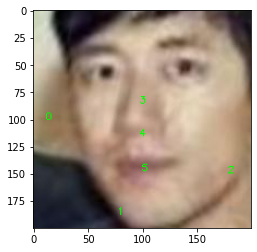

In [172]:
# 왼쪽 턱, 아래 턱 , 오른쪽 턱,  코 좌표 3,8,13,30 / 입술 중간 좌표 63 / 입술 더 위 52 / 코끝 34 / 아랫입술 58 / 좀 더 위에 67
left, right, chin, nose, undernose, lip = \
np.array(lm[2]), np.array(lm[7]), np.array(lm[12]), np.array(lm[29]), np.array(lm[33]), np.array(lm[66])
# leftnp.array(lm[29])
li = [left, right, chin, nose, undernose, lip]
color = [0,255,0]
for i, (x,y) in enumerate(li):
    x, y = int(x), int(y)
    cv2.putText(person, str(i), (x,y), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.3, color)

plt.imshow(person)
# cv2.destroyAllWindows()
# center_x = int((nose[0] + chin[0]) // 2)
# center_y = int((nose[1] + chin[1]) // 2)
# print(center_x)

In [253]:
def make_mask_image(path):

    def get_distance_from_point_to_line(point, line_point1, line_point2):
        distance = np.abs((line_point2[1] - line_point1[1]) * point[0] +
                          (line_point1[0] - line_point2[0]) * point[1] +
                          (line_point2[0] - line_point1[0]) * line_point1[1] +
                          (line_point1[1] - line_point2[1]) * line_point1[0]) / \
                   np.sqrt((line_point2[1] - line_point1[1]) * (line_point2[1] - line_point1[1]) +
                           (line_point1[0] - line_point2[0]) * (line_point1[0] - line_point2[0]))
        return int(distance)
    
    append_list = []
    make_which_mask = ['correct', 'lipsk', 'chinsk']
    for which in make_which_mask:
        person = Image.open(path)
        bmask = Image.open(bmask_path)
        width = bmask.width
        height = bmask.height
        width_ratio = 1.2

        if which == 'correct':
            new_height = int(np.linalg.norm(left - right))
        elif which == 'lipsk':
            new_height = int(np.linalg.norm(left - right) * 0.7)
        else : 
            width_ratio = 1.2
            new_height = int(np.linalg.norm(left - right) * 0.4)
        # new_height = int((chin[1] - nose[1]))
#         print(new_height)

        # left
        mask_left_img = bmask.crop((0, 0, width // 2, height))
        mask_left_width = get_distance_from_point_to_line(left, nose, chin)
        mask_left_width = int(mask_left_width * width_ratio)
        mask_left_img = mask_left_img.resize((mask_left_width, new_height))
#         mask_left_img

        # right
        mask_right_img = bmask.crop((width // 2, 0, width, height))
        mask_right_width = get_distance_from_point_to_line(right, nose, chin)
        mask_right_width = int(mask_right_width * width_ratio)
        mask_right_img = mask_right_img.resize((mask_right_width, new_height))
#         mask_right_img
        # merge mask
        size = (mask_left_img.width + mask_right_img.width, new_height)
        mask_img = Image.new('RGBA', size)
        mask_img.paste(mask_left_img, (0, 0), mask_left_img)
        mask_img.paste(mask_right_img, (mask_left_img.width, 0), mask_right_img)
#         mask_img

        # rotate mask
        angle = np.arctan2(chin[1] - nose[1], chin[0] - nose[0])
        rotated_mask_img = mask_img.rotate(angle, expand=True)
        rotated_mask_img
        # calculate mask location
        center_x = (nose[0] + chin[0]) // 2
        center_y = (nose[1] + chin[1]) // 2
#         print(nose, chin, center_x, center_y)

        offset = mask_img.width // 2 - mask_left_img.width
        radian = angle * np.pi / 180
        box_x = center_x + int(offset * np.cos(radian)) - rotated_mask_img.width // 2
        box_y = center_y + int(offset * np.sin(radian)) - rotated_mask_img.height // 2
#         print(box_x, box_y)
        if which == 'correct':
            box_x, box_y = left[0], nose[1]
        elif which == 'lipsk':
            box_x, box_y = left[0], lip[1]
        else:
            box_x, box_y = left[0], lip[1]

#         print(rotated_mask_img.size)
        person.paste(rotated_mask_img, (int(box_x), int(box_y)), rotated_mask_img)
        
        pt = path.split('/')[-1]
        file_name_path = new_path + '/' + which + pt # your own repository path
        person.save(file_name_path)
        print(f'save file {file_name_path}')

        label = define_class(age, gender, which)
        append_list.append([file_name_path, label])
        
    return append_list
        
        
#         print(count)

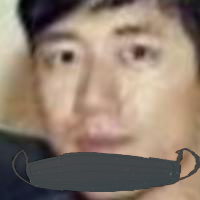

In [254]:
person

In [255]:
len_ = len(utkface)
id_ = []
path = []
gender = []
age = []
race = []
# label = []
landmark = []
label = []

dfdict = {'id' : id_, 'path' :path, 'gender':gender, 'age': age, 'race' :race, 'landmark' : landmark, 'class' : label}
mask_df = pd.DataFrame(dfdict)

for i in range(len_):
    id_, path, gender, age, race, landmark, label = utkface.loc[i]
    
    # 왼쪽 턱, 아래 턱 , 오른쪽 턱,  코 좌표 3,8,13,30 / 입술 중간 좌표 63 / 입술 더 위 52 / 코끝 34 / 아랫입술 58 / 좀 더 위에 67
    left, right, chin, nose, undernose, lip = \
    np.array(lm[2]), np.array(lm[7]), np.array(lm[12]), np.array(lm[29]), np.array(lm[33]), np.array(lm[66])
    
    append_list = make_mask_image(path)
    
    # csv 에 저장
    append_value = []
    for path, label in append_list:
        append_value.append({'id': id_, 'path':path, 'gender':gender, 'age': age, 'race': race, 'landmark' : landmark, 'class':label})
    mask_df = mask_df.append(append_value, ignore_index = True)


save file /opt/ml/newinput/UTKFace/correct35_0_2_20170116191717131.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/lipsk35_0_2_20170116191717131.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/chinsk35_0_2_20170116191717131.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/correct28_0_2_20170116191256645.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/lipsk28_0_2_20170116191256645.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/chinsk28_0_2_20170116191256645.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/correct31_0_2_20170116183822859.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/lipsk31_0_2_20170116183822859.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/chinsk31_0_2_20170116183822859.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/correct90_0_2_20170111210740854.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/lipsk90_0_2_20170111210740854.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/chinsk90_0_2_20170111210740854.jpg.chip.jpg
save file /opt/ml/newinput/UTKFace/correct26_1_2_201

In [257]:
len(mask_df)
mask_df.tail()

,id,path,gender,age,race,landmark,class
7468,2.017010e+16,/opt/ml/newinput/UTKFace/lipsk29_1_2_201701040...,1.0,29.0,2.0,"[(32.0, 56.0), (32.0, 78.0), (35.0, 100.0), (3...",9.0
7469,2.017010e+16,/opt/ml/newinput/UTKFace/chinsk29_1_2_20170104...,1.0,29.0,2.0,"[(32.0, 56.0), (32.0, 78.0), (35.0, 100.0), (3...",9.0
7470,2.017012e+16,/opt/ml/newinput/UTKFace/correct80_1_2_2017011...,1.0,80.0,2.0,"[(-1.0, 62.0), (-1.0, 88.0), (0.0, 113.0), (2....",5.0
7471,2.017012e+16,/opt/ml/newinput/UTKFace/lipsk80_1_2_201701192...,1.0,80.0,2.0,"[(-1.0, 62.0), (-1.0, 88.0), (0.0, 113.0), (2....",11.0
7472,2.017012e+16,/opt/ml/newinput/UTKFace/chinsk80_1_2_20170119...,1.0,80.0,2.0,"[(-1.0, 62.0), (-1.0, 88.0), (0.0, 113.0), (2....",11.0


In [261]:
mask_df.path[80]

'/opt/ml/newinput/UTKFace/chinsk40_1_2_20170109003053046.jpg.chip.jpg'

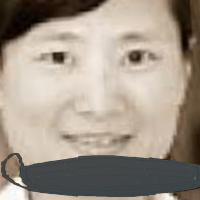

In [262]:
Image.open(mask_df.path[80])

In [266]:
result = pd.concat([utkface,mask_df], ignore_index=True)
result.head()
# result.tail()

,id,path,gender,age,race,landmark,class
0,2.017012e+16,/opt/ml/newinput/UTKFace/35_0_2_20170116191717...,0.0,35.0,2.0,"[(-6.0, 67.0), (-3.0, 92.0), (-1.0, 117.0), (1...",13.0
1,2.017012e+16,/opt/ml/newinput/UTKFace/28_0_2_20170116191256...,0.0,28.0,2.0,"[(4.0, 54.0), (7.0, 79.0), (12.0, 103.0), (18....",12.0
2,2.017012e+16,/opt/ml/newinput/UTKFace/31_0_2_20170116183822...,0.0,31.0,2.0,"[(3.0, 54.0), (6.0, 77.0), (11.0, 100.0), (17....",13.0
3,2.017011e+16,/opt/ml/newinput/UTKFace/90_0_2_20170111210740...,0.0,90.0,2.0,"[(19.0, 87.0), (20.0, 107.0), (25.0, 127.0), (...",14.0
4,2.017010e+16,/opt/ml/newinput/UTKFace/26_1_2_20170104022154...,1.0,26.0,2.0,"[(-3.0, 82.0), (-2.0, 103.0), (-1.0, 125.0), (...",15.0


In [274]:
new_input_path = '/opt/ml/newinput/'
result.to_csv(new_input_path + 'UTKFace_total.csv', index=False)

In [270]:
import re
for i in range(len(result)):
    _ ,path, _, _,_,_,_ = result.loc[i]
    new_path = re.sub(r'UTKFace', 'UTKFace_revised', path)
#     print(new_path)
#     break
    img = Image.open(path)
    img.save(new_path)

In [256]:
before = os.listdir(new_path)
len(before)

31181

In [271]:
len(os.listdir(new_input_path + '/UTKFace_revised'))

9964

In [272]:
result['path'] = result['path'].map(lambda x : re.sub(r'UTKFace', 'UTKFace_revised', x))

In [273]:
result.head()

,id,path,gender,age,race,landmark,class
0,2.017012e+16,/opt/ml/newinput/UTKFace_revised/35_0_2_201701...,0.0,35.0,2.0,"[(-6.0, 67.0), (-3.0, 92.0), (-1.0, 117.0), (1...",13.0
1,2.017012e+16,/opt/ml/newinput/UTKFace_revised/28_0_2_201701...,0.0,28.0,2.0,"[(4.0, 54.0), (7.0, 79.0), (12.0, 103.0), (18....",12.0
2,2.017012e+16,/opt/ml/newinput/UTKFace_revised/31_0_2_201701...,0.0,31.0,2.0,"[(3.0, 54.0), (6.0, 77.0), (11.0, 100.0), (17....",13.0
3,2.017011e+16,/opt/ml/newinput/UTKFace_revised/90_0_2_201701...,0.0,90.0,2.0,"[(19.0, 87.0), (20.0, 107.0), (25.0, 127.0), (...",14.0
4,2.017010e+16,/opt/ml/newinput/UTKFace_revised/26_1_2_201701...,1.0,26.0,2.0,"[(-3.0, 82.0), (-2.0, 103.0), (-1.0, 125.0), (...",15.0


In [275]:
UTKFace_only = result[['path', 'class']]
UTKFace_only.head()

,path,class
0,/opt/ml/newinput/UTKFace_revised/35_0_2_201701...,13.0
1,/opt/ml/newinput/UTKFace_revised/28_0_2_201701...,12.0
2,/opt/ml/newinput/UTKFace_revised/31_0_2_201701...,13.0
3,/opt/ml/newinput/UTKFace_revised/90_0_2_201701...,14.0
4,/opt/ml/newinput/UTKFace_revised/26_1_2_201701...,15.0


In [277]:
new_input_path = '/opt/ml/newinput/'
UTKFace_only.to_csv(new_input_path + 'UTKFace_only.csv', index=False)

In [41]:
new_input_path = '/opt/ml/newinput/'
import pandas as pd
reclass = pd.read_csv(new_input_path + 'UTKFace_total.csv')

In [42]:

reclass.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9964 non-null   float64
 1   path      9964 non-null   object 
 2   gender    9964 non-null   float64
 3   age       9964 non-null   float64
 4   race      9964 non-null   float64
 5   landmark  9964 non-null   object 
 6   class     9964 non-null   float64
dtypes: float64(5), object(2)
memory usage: 545.0+ KB


In [33]:
reclass.head()

,id,path,gender,age,race,landmark,class
0,2.017012e+16,/opt/ml/newinput/UTKFace_revised/35_0_2_201701...,0.0,35.0,2.0,"[(-6.0, 67.0), (-3.0, 92.0), (-1.0, 117.0), (1...",13.0
1,2.017012e+16,/opt/ml/newinput/UTKFace_revised/28_0_2_201701...,0.0,28.0,2.0,"[(4.0, 54.0), (7.0, 79.0), (12.0, 103.0), (18....",12.0
2,2.017012e+16,/opt/ml/newinput/UTKFace_revised/31_0_2_201701...,0.0,31.0,2.0,"[(3.0, 54.0), (6.0, 77.0), (11.0, 100.0), (17....",13.0
3,2.017011e+16,/opt/ml/newinput/UTKFace_revised/90_0_2_201701...,0.0,90.0,2.0,"[(19.0, 87.0), (20.0, 107.0), (25.0, 127.0), (...",14.0
4,2.017010e+16,/opt/ml/newinput/UTKFace_revised/26_1_2_201701...,1.0,26.0,2.0,"[(-3.0, 82.0), (-2.0, 103.0), (-1.0, 125.0), (...",15.0


In [34]:

reclass['gender'] = reclass['gender'].map(lambda x : str(int(x)))
reclass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        9964 non-null   float64
 1   path      9964 non-null   object 
 2   gender    9964 non-null   object 
 3   age       9964 non-null   float64
 4   race      9964 non-null   float64
 5   landmark  9964 non-null   object 
 6   class     9964 non-null   float64
dtypes: float64(4), object(3)
memory usage: 545.0+ KB


In [35]:

reclass.loc[0]

id                                                2.01701e+16
path        /opt/ml/newinput/UTKFace_revised/35_0_2_201701...
gender                                                      0
age                                                        35
race                                                        2
landmark    [(-6.0, 67.0), (-3.0, 92.0), (-1.0, 117.0), (1...
class                                                      13
Name: 0, dtype: object

In [6]:
tmp = reclass['path'][7000]
print(tmp.split('/'))

['', 'opt', 'ml', 'newinput', 'UTKFace_revised', 'correct26_1_2_20170116163008149.jpg.chip.jpg']


In [47]:
def redefine_class(age, gender, m = 'notwear'):
    if m == 'cor':
        if int(gender) == 0: # male
            if age < 30:
                return 0
            elif 30 <= age < 60:
                return 1
            else:
                return 2
        else:
            if age < 30:
                return 3
            elif 30 <= age < 60:
                return 4
            else:
                return 5
            
    elif (m == 'lip') or (m == 'chi'):
        if int(gender) == 0: # male
            if age < 30:
                return 6
            elif 30 <= age < 60:
                return 7
            else:
                return 8
        else:
            if age < 30:
                return 9
            elif 30 <= age < 60:
                return 10
            else:
                return 11
    else:
        if gender == '0': # male
            if age < 30:
                return 12
            elif 30 <= age < 60:
                return 13
            else:
                return 14
        else:
            if age < 30:
                return 15
            elif 30 <= age < 60:
                return 16
            else:
                return 17
        
        

In [48]:
relen = len(reclass)
for i in range(relen):
    _, path, gender,age,  _,_,_ = reclass.loc[i]
    # print( type(age), type(gender), gender)
    m = path.split('/')[5][:3]
    # print(m)
    label = redefine_class(age = age, gender = gender, m = m)
    reclass.loc[i]['class'] = label
    # break

/opt/conda/envs/face/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
reclass['class'].value_counts()

9.0     2836
10.0    1598
3.0     1418
15.0    1023
4.0      799
11.0     548
13.0     484
12.0     395
16.0     315
5.0      274
14.0     199
17.0      75
Name: class, dtype: int64

In [27]:
reclass.tail(10)

,id,path,gender,age,race,landmark,class
9954,2.017012e+16,/opt/ml/newinput/UTKFace_revised/chinsk30_0_2_...,0.0,30.0,2.0,"[(11.0, 70.0), (11.0, 91.0), (13.0, 113.0), (1...",10.0
9955,2.017011e+16,/opt/ml/newinput/UTKFace_revised/correct24_0_2...,0.0,24.0,2.0,"[(29.0, 62.0), (29.0, 81.0), (32.0, 100.0), (3...",3.0
9956,2.017011e+16,/opt/ml/newinput/UTKFace_revised/lipsk24_0_2_2...,0.0,24.0,2.0,"[(29.0, 62.0), (29.0, 81.0), (32.0, 100.0), (3...",9.0
9957,2.017011e+16,/opt/ml/newinput/UTKFace_revised/chinsk24_0_2_...,0.0,24.0,2.0,"[(29.0, 62.0), (29.0, 81.0), (32.0, 100.0), (3...",9.0
9958,2.017010e+16,/opt/ml/newinput/UTKFace_revised/correct29_1_2...,1.0,29.0,2.0,"[(32.0, 56.0), (32.0, 78.0), (35.0, 100.0), (3...",3.0
9959,2.017010e+16,/opt/ml/newinput/UTKFace_revised/lipsk29_1_2_2...,1.0,29.0,2.0,"[(32.0, 56.0), (32.0, 78.0), (35.0, 100.0), (3...",9.0
9960,2.017010e+16,/opt/ml/newinput/UTKFace_revised/chinsk29_1_2_...,1.0,29.0,2.0,"[(32.0, 56.0), (32.0, 78.0), (35.0, 100.0), (3...",9.0
9961,2.017012e+16,/opt/ml/newinput/UTKFace_revised/correct80_1_2...,1.0,80.0,2.0,"[(-1.0, 62.0), (-1.0, 88.0), (0.0, 113.0), (2....",5.0
9962,2.017012e+16,/opt/ml/newinput/UTKFace_revised/lipsk80_1_2_2...,1.0,80.0,2.0,"[(-1.0, 62.0), (-1.0, 88.0), (0.0, 113.0), (2....",11.0
9963,2.017012e+16,/opt/ml/newinput/UTKFace_revised/chinsk80_1_2_...,1.0,80.0,2.0,"[(-1.0, 62.0), (-1.0, 88.0), (0.0, 113.0), (2....",11.0


In [29]:
tmp = pd.DataFrame({'asd' : [1,2,3], 'sdf' : [4,5,6]})
tmp.head()

,asd,sdf
0,1,4
1,2,5
2,3,6


In [30]:
tmp.loc[0]['asd'] = 333
tmp

,asd,sdf
0,333,4
1,2,5
2,3,6


In [1]:
root = '/opt/ml/newinput/UTKFace_revised'
_, _, names = next(os.walk(root))
cnt = 0
total_list = []
per_list = []
print(len(names))
for name in names:
    per_list = []
    per_list.append(os.path.join(root, name))
    tmp = name.split('_')
    print(tmp)
    if 'chin' in tmp[0] or 'cor' in tmp[0] or 'lip' in tmp[0]:
        age_1 = tmp[0][-2]
        age_2 = tmp[0][-1]
        age = age_1 + age_2
        age = int(age)
        gen = int(tmp[1])
        per_list.append(age)
        per_list.append(gen)
        if 'chin' in tmp[0] or 'lip' in tmp[0]:
            if gen == 0:
                if age < 30:
                        per_list.append(6)
                elif 30 <= age < 60:
                        per_list.append(7)
                elif age >= 60:
                        per_list.append(8)
            elif gen == 1:
                if age < 30:
                        per_list.append(9)
                elif 30 <= age < 60:
                        per_list.append(10)
                elif age >= 60:
                        per_list.append(11)
                
        elif 'cor' in tmp[0]:
            if gen == 0:
                if age < 30:
                        per_list.append(0)
                elif 30 <= age < 60:
                        per_list.append(1)
                elif age >= 60:
                        per_list.append(2)
            if gen == 1:
                if age < 30:
                        per_list.append(3)
                elif 30 <= age < 60:
                        per_list.append(4)
                elif age >= 60:
                        per_list.append(5)
    else :
            age = int(tmp[0])
            gen = int(tmp[1])
            per_list.append(age)
            per_list.append(gen)
            if gen == 0:
                if age < 30:
                        per_list.append(12)
                elif 30 <= age < 60:
                        per_list.append(13)
                elif age >= 60:
                        per_list.append(14)
            if gen == 1:
                if age < 30:
                        per_list.append(15)
                elif 30 <= age < 60:
                        per_list.append(16)
                elif age >= 60:
                        per_list.append(17)
    total_list.append(per_list)

9964
['chinsk28', '1', '2', '20170104022917342.jpg.chip.jpg']
['chinsk61', '0', '2', '20170116191832323.jpg.chip.jpg']
['lipsk79', '0', '2', '20170116194001100.jpg.chip.jpg']
['correct30', '1', '2', '20170117131105589.jpg.chip.jpg']
['lipsk39', '0', '2', '20170116170832396.jpg.chip.jpg']
['correct26', '1', '2', '20170116184054722.jpg.chip.jpg']
['chinsk39', '1', '2', '20170116164304221.jpg.chip.jpg']
['lipsk32', '1', '2', '20170116190151626.jpg.chip.jpg']
['lipsk23', '1', '2', '20170116173108901.jpg.chip.jpg']
['correct45', '0', '2', '20170112215145176.jpg.chip.jpg']
['35', '0', '2', '20170116191717131.jpg.chip.jpg']
['chinsk28', '0', '2', '20170116190050357.jpg.chip.jpg']
['correct35', '0', '2', '20170116182734834.jpg.chip.jpg']
['correct27', '0', '2', '20170105161443219.jpg.chip.jpg']
['lipsk28', '0', '2', '20170116170900610.jpg.chip.jpg']
['correct36', '1', '2', '20170119164406148.jpg.chip.jpg']
['correct24', '0', '2', '20170116170804180.jpg.chip.jpg']
['28', '0', '2', '201701161912

In [2]:
import csv
header = ['path', 'age', 'gender', 'class']

with open('/opt/ml/newinput/UTKFace_total.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(total_list)

In [4]:
import pandas as pd
tt = pd.read_csv('/opt/ml/newinput/UTKFace_total.csv')
tt.head()

,path,age,gender,class
0,/opt/ml/newinput/UTKFace_revised/chinsk28_1_2_...,28,1,9
1,/opt/ml/newinput/UTKFace_revised/chinsk61_0_2_...,61,0,8
2,/opt/ml/newinput/UTKFace_revised/lipsk79_0_2_2...,79,0,8
3,/opt/ml/newinput/UTKFace_revised/correct30_1_2...,30,1,4
4,/opt/ml/newinput/UTKFace_revised/lipsk39_0_2_2...,39,0,7


In [5]:
len(tt)

9964

In [6]:
tt['class'].value_counts()

9     2046
15    1023
3     1023
7      968
6      790
10     630
13     484
1      484
8      398
12     395
0      395
4      315
16     315
2      199
14     199
11     150
5       75
17      75
Name: class, dtype: int64

In [8]:
utk_only = tt[['path','class']]
utk_only.to_csv('/opt/ml/newinput/UTKFace_only.csv', index=False)